
# Random Forest Classifier 


In [1]:
import warnings

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
warnings.filterwarnings('ignore')

# **1. Import dataset** 

In [3]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

# **2. Exploratory data analysis** 


In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


low      432
med      432
high     432
vhigh    432
Name: buying, dtype: int64
low      432
med      432
high     432
vhigh    432
Name: maint, dtype: int64
4        432
3        432
2        432
5more    432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


### Explore `class` variable

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### Missing values in variables

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
#Encoding Categorical variables
def preprocessing(column):
    lbl = LabelEncoder()
    for col in column:
        lbl.fit(df[col])
        df[col] = lbl.transform(df[col].values.reshape(-1,))
columns_process = ["buying","maint","doors","persons","lug_boot","safety"]
preprocessing(columns_process)

# **3. Declare feature vector and target variable** 

In [13]:
X = df.drop(['class'], axis=1)

y = df['class']

# **4. Split data into separate training and test set** 

In [14]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


# **6. Random Forest Classifier model with default parameters**

In [17]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9545


# **7. Random Forest Classifier model with parameter n_estimators=100** 


In [18]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9545


In [19]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [20]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.265392
persons     0.222230
buying      0.201751
maint       0.154568
lug_boot    0.089286
doors       0.066773
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

# **8. Visualize feature scores of the features** 


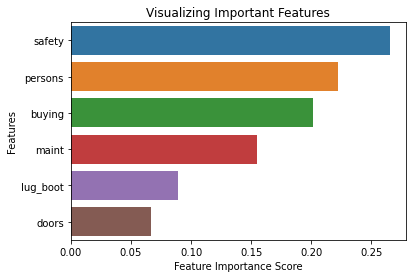

In [21]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# **9. Build Random Forest model on selected features**


Now, I will drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [22]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [24]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9299


In [25]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106  12   8   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


# **10. Classification Report**

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.82      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.94      0.93      0.93       571



# **12. References**



3. https://en.wikipedia.org/wiki/Random_forest

4. https://www.datacamp.com/community/tutorials/random-forests-classifier-python

5. http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

6. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/